In [1]:
#imported important libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [4]:
#reading the dataset
df = pd.read_csv( ")

#### df

In [5]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [6]:
#They are 4920 rows, 133 columns
df.shape

(4920, 133)

In [13]:
#seeing any null values are there with descending format
df.isnull().sum().sort_values(ascending=False)

prognosis               0
malaise                 0
nausea                  0
loss_of_appetite        0
pain_behind_the_eyes    0
                       ..
internal_itching        0
toxic_look_(typhos)     0
depression              0
irritability            0
itching                 0
Length: 133, dtype: int64

In [14]:
df.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [35]:
#looking how much percent each diseases having
df['prognosis'].value_counts(normalize = True)

Arthritis                                  0.02439
Gastroenteritis                            0.02439
Chronic cholestasis                        0.02439
Hepatitis E                                0.02439
Urinary tract infection                    0.02439
Jaundice                                   0.02439
Acne                                       0.02439
Hepatitis B                                0.02439
Allergy                                    0.02439
Hepatitis D                                0.02439
Impetigo                                   0.02439
Chicken pox                                0.02439
Malaria                                    0.02439
Hypoglycemia                               0.02439
Varicose veins                             0.02439
Migraine                                   0.02439
Drug Reaction                              0.02439
Hypothyroidism                             0.02439
Bronchial Asthma                           0.02439
Heart attack                   

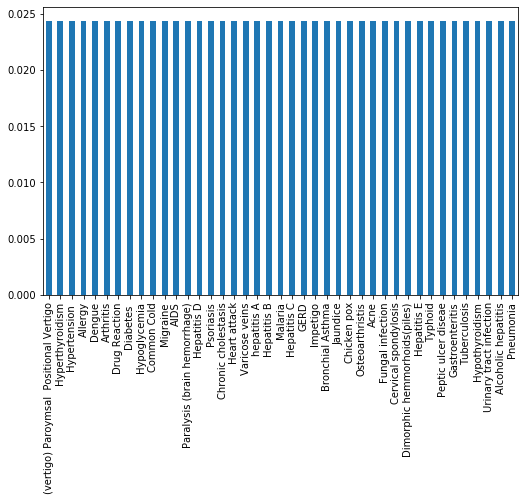

In [15]:
#as we can see each no. diseases having the same percentage through bar chart
df['prognosis'].value_counts(normalize = True).plot.bar()
plt.subplots_adjust(left = 0.9, right = 2 , top = 2, bottom = 1)

In [16]:
#checking if there are any other data types
df.dtypes.unique()

array([dtype('int64'), dtype('O')], dtype=object)

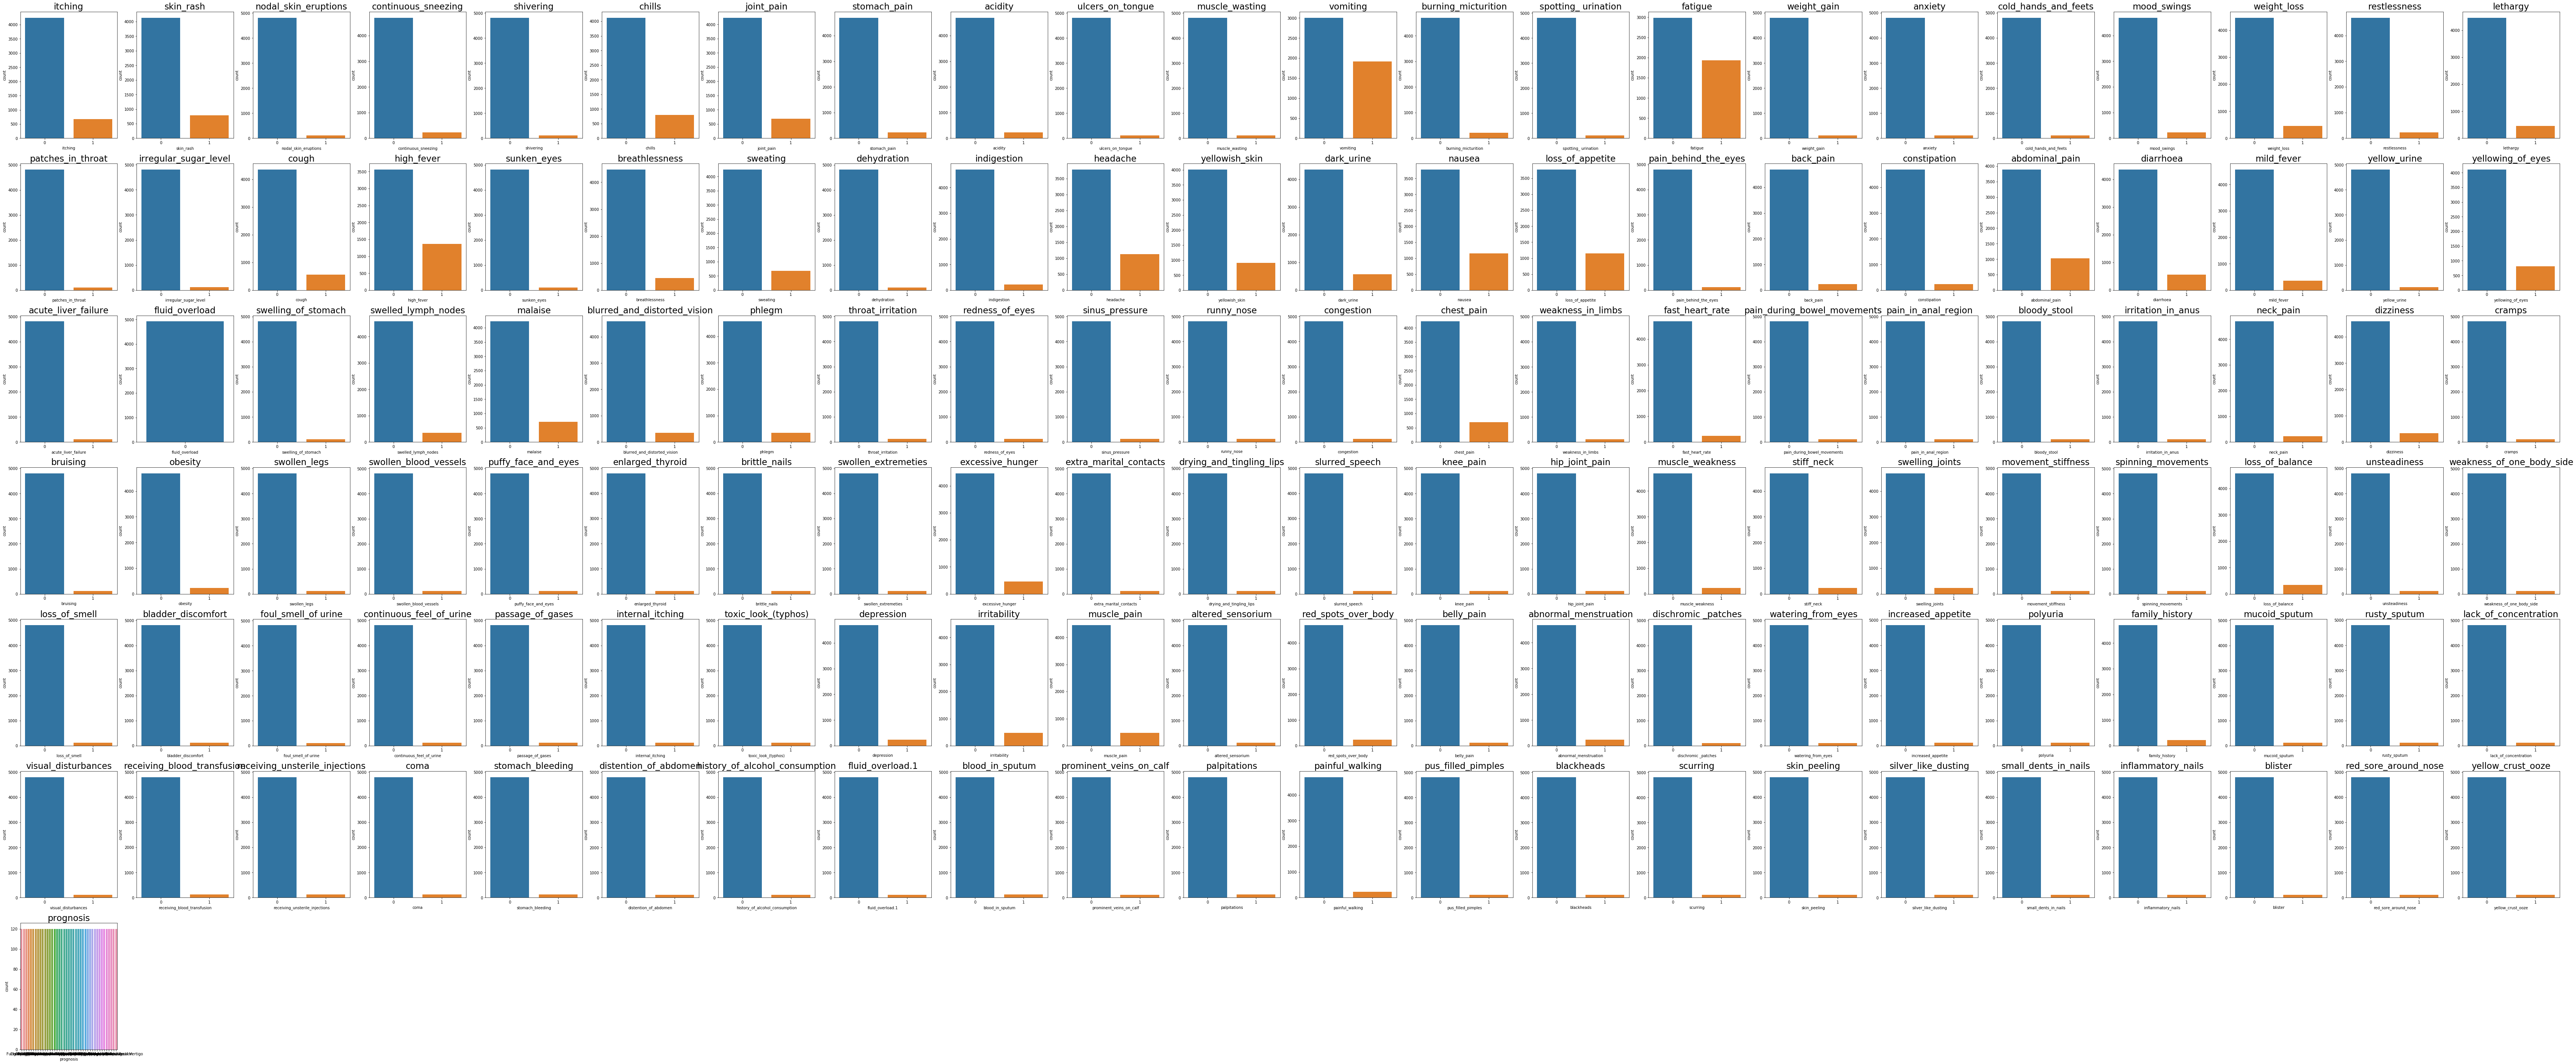

In [38]:
#Analyzing each symptoms/variable
for x in range(df.shape[1]):
    plt.subplot(7,22,x+1)
    plt.subplots_adjust(left = 0.5, right = 16 , top = 10, bottom = 0.5)
    sns.countplot(df[df.columns[x]]).set_title(df.columns[x],fontsize=23)

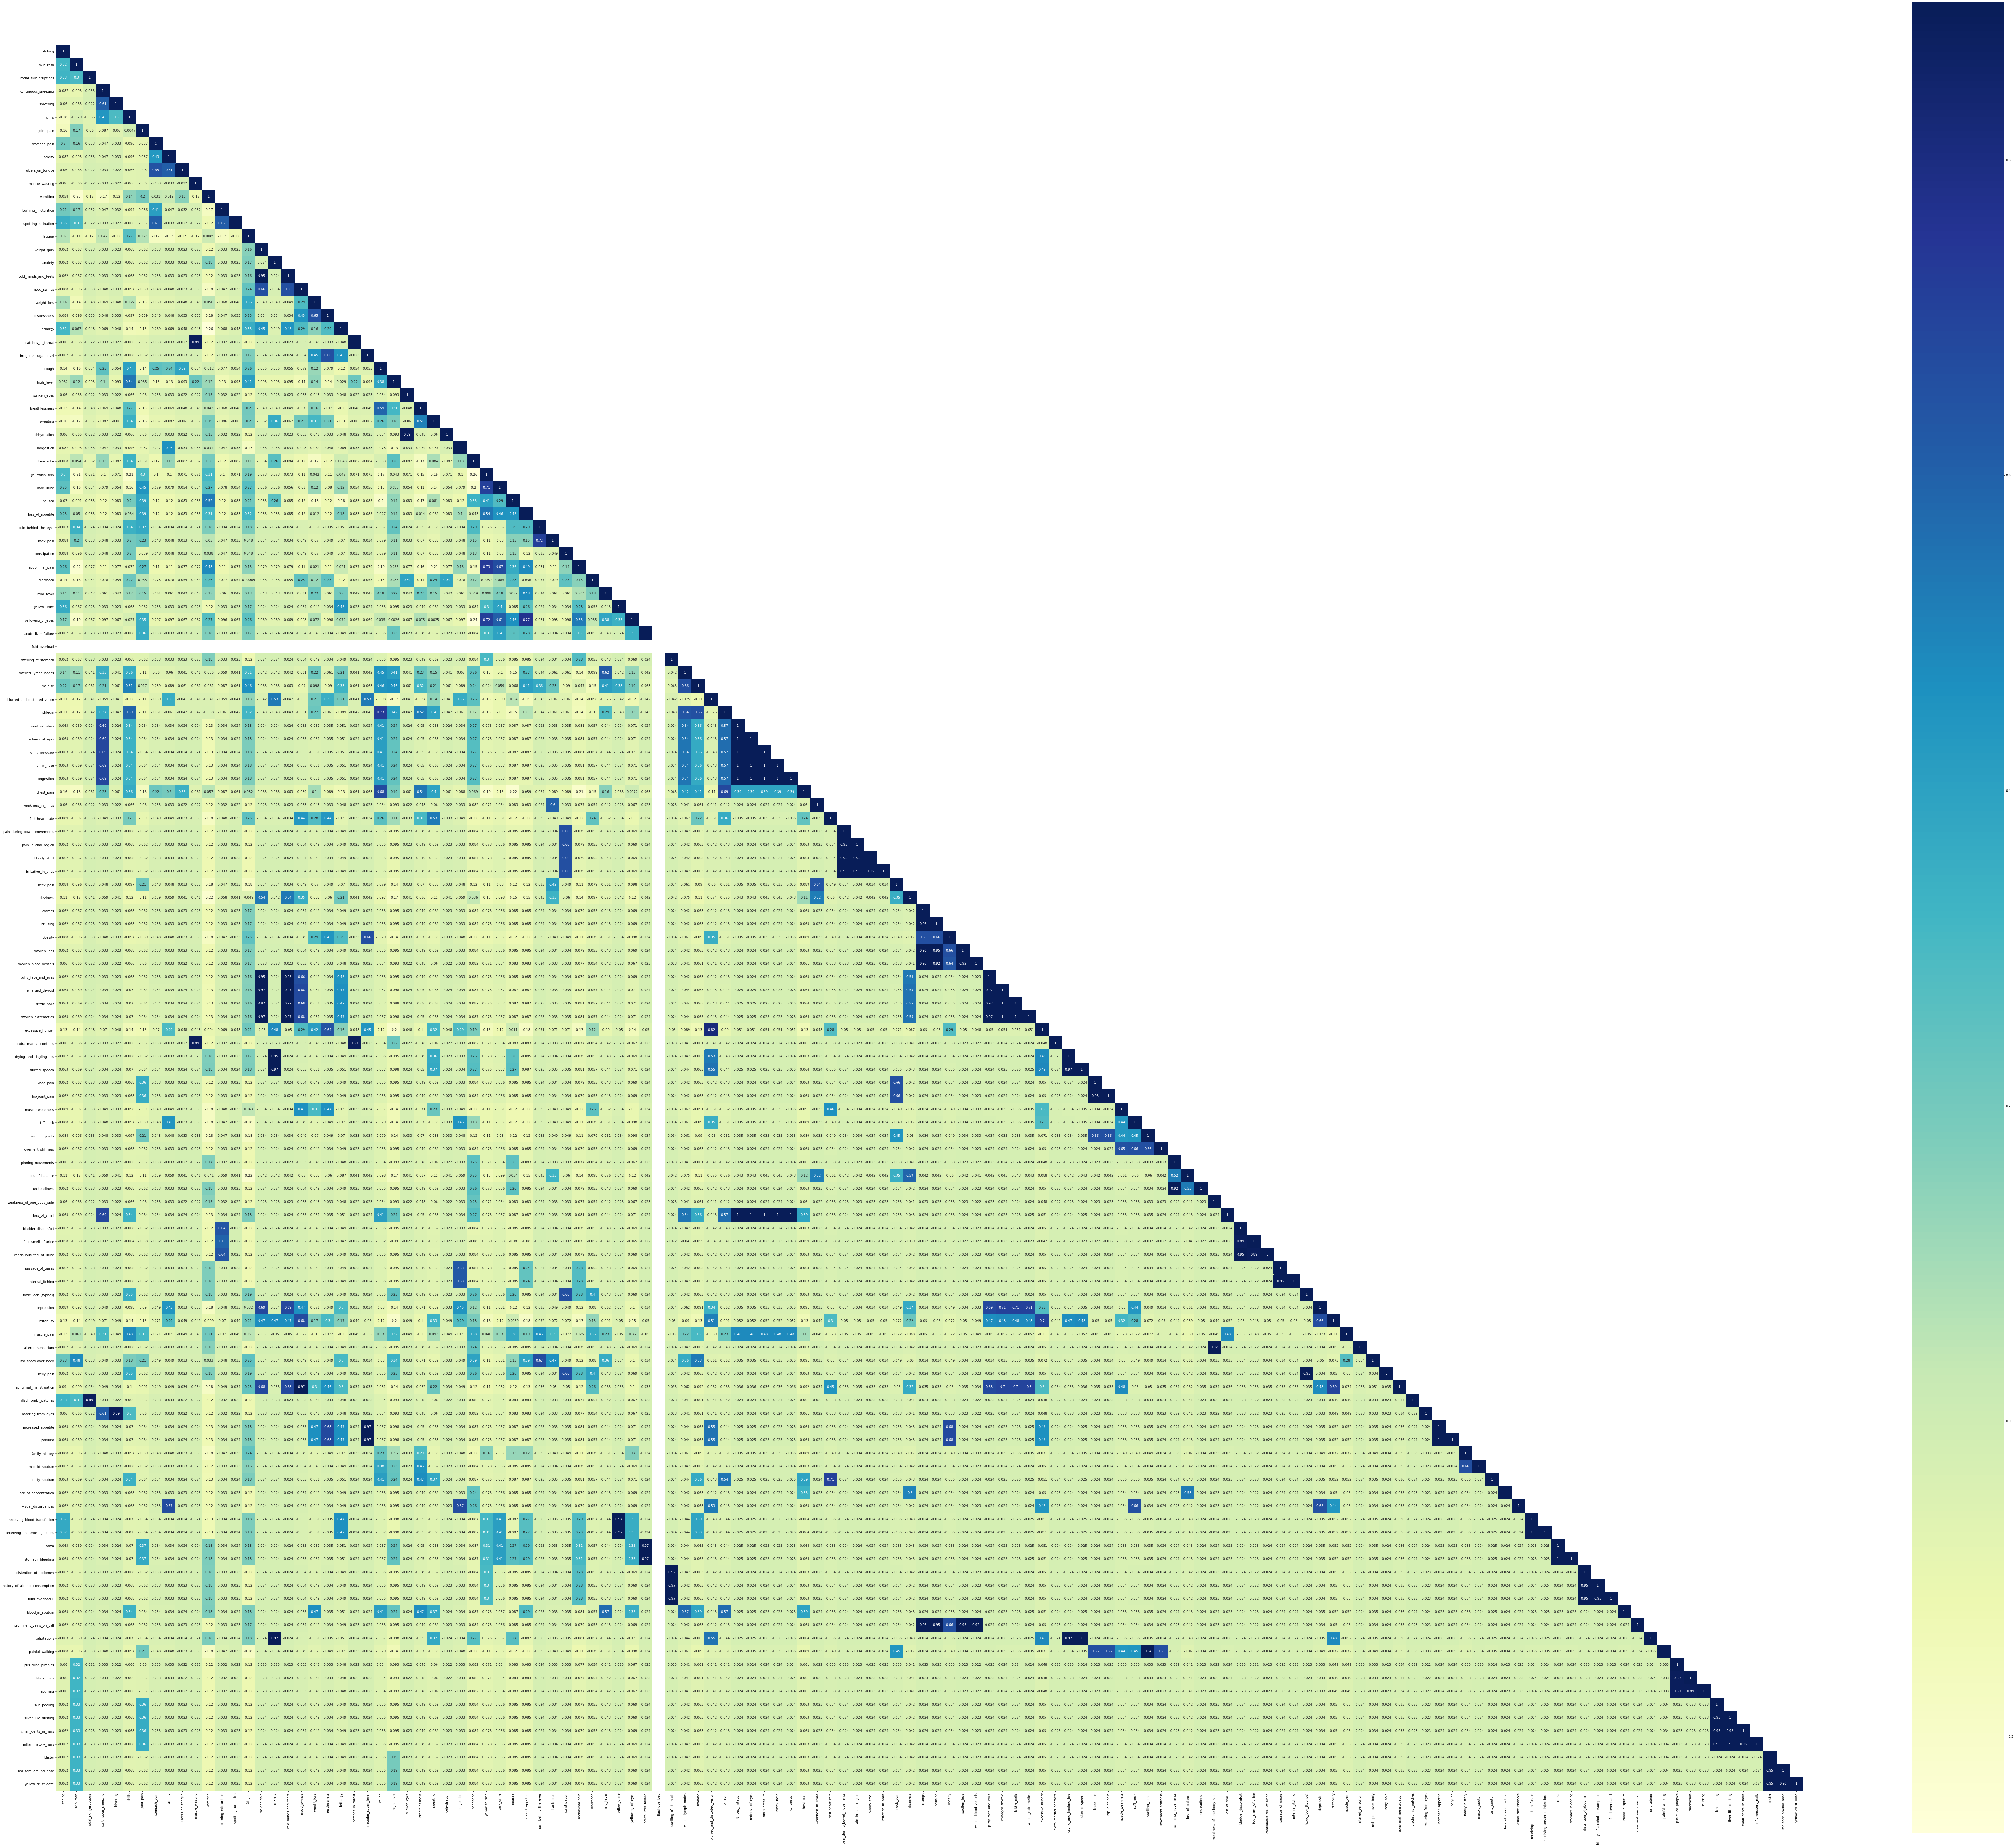

In [39]:
#checking the relationship between the variables by applying the correlation 
corr = df.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
plt.subplots_adjust(left = 0.5, right = 16 , top = 20, bottom = 0.5)
sns.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

In [17]:
#took two high correlation variables and analysing if it is satisfying null hypothesis or alternate hypothesis
pd.crosstab(df['cold_hands_and_feets'],df['weight_gain'])

weight_gain,0,1
cold_hands_and_feets,,
0,4800,6
1,6,108


In [18]:
#imported the chi square contingency
from scipy.stats import chi2_contingency

In [19]:
#as p value is  0.0  which is less than 0.05 then they are actually different from each other which satisfy the alternate hypothesis 
chi2_contingency(pd.crosstab(df['cold_hands_and_feets'],df['weight_gain']))

(4362.40173527245, 0.0, 1, array([[4.69464146e+03, 1.11358537e+02],
        [1.11358537e+02, 2.64146341e+00]]))

In [20]:
#seperated the independent and dependent values to repective variables 
x = df.drop(['prognosis'],axis =1)
y = df['prognosis']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
#divided into testing and training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [23]:
#imported naive_baye algorithm
from sklearn.naive_bayes import MultinomialNB

In [24]:
#fitted the model
mnb = MultinomialNB()
mnb = mnb.fit(x_train, y_train)

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
y_pred = mnb.predict(x_test)

In [27]:
accuracy_score(y_pred,y_test)

1.0

In [28]:
#by cross validating we got mean also 100%
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mnb, x_test, y_test, cv=3)
print (scores)
print (scores.mean())

[1. 1. 1.]
1.0


In [29]:
real_diseases = y_test.values

In [53]:
#for the cross checking purpose i want to see if predicted values and actual values are same else it gives me worng prediction 
for i in range(0, len(real_diseases)):
    if y_pred[i] == real_diseases[i]:
        print ('Pred: {0} Actual:{1}'.format(y_pred[i], real_diseases[i]))
    else:
        print('worng prediction')
        print ('Pred: {0} Actual:{1}'.format(y_pred[i], real_diseases[i]))

Pred: Acne Actual:Acne
Pred: Acne Actual:Acne
Pred: Hyperthyroidism Actual:Hyperthyroidism
Pred: AIDS Actual:AIDS
Pred: Chronic cholestasis Actual:Chronic cholestasis
Pred: Hypertension  Actual:Hypertension 
Pred: Hypoglycemia Actual:Hypoglycemia
Pred: Arthritis Actual:Arthritis
Pred: Hepatitis B Actual:Hepatitis B
Pred: Migraine Actual:Migraine
Pred: Urinary tract infection Actual:Urinary tract infection
Pred: Diabetes  Actual:Diabetes 
Pred: Hepatitis D Actual:Hepatitis D
Pred: Psoriasis Actual:Psoriasis
Pred: Alcoholic hepatitis Actual:Alcoholic hepatitis
Pred: Alcoholic hepatitis Actual:Alcoholic hepatitis
Pred: Dimorphic hemmorhoids(piles) Actual:Dimorphic hemmorhoids(piles)
Pred: Hepatitis E Actual:Hepatitis E
Pred: Diabetes  Actual:Diabetes 
Pred: Cervical spondylosis Actual:Cervical spondylosis
Pred: Bronchial Asthma Actual:Bronchial Asthma
Pred: hepatitis A Actual:hepatitis A
Pred: Hepatitis B Actual:Hepatitis B
Pred: Bronchial Asthma Actual:Bronchial Asthma
Pred: Allergy Actu

In [30]:
#imported Kfold
from sklearn.model_selection import KFold


In [56]:
## Function to run multiple algorithms with different K values of KFold.
def evaluate(train_data,kmax,algo):
    test_scores = {}
    train_scores = {}
    for i in range(2,kmax,2):
        kf = KFold(n_splits = i)
        sum_train = 0
        sum_test = 0
        data = df
        for train,test in kf.split(data):
            train_data = data.iloc[train,:]
            test_data = data.iloc[test,:]
            x_train = train_data.drop(["prognosis"],axis=1)
            y_train = train_data['prognosis']
            x_test = test_data.drop(["prognosis"],axis=1)
            y_test = test_data["prognosis"]
            algo_model = algo.fit(x_train,y_train)
            sum_train += algo_model.score(x_train,y_train)
            y_pred = algo_model.predict(x_test)
            sum_test += accuracy_score(y_test,y_pred)
        average_test = sum_test/i
        average_train = sum_train/i
        test_scores[i] = average_test
        train_scores[i] = average_train
        print("kvalue: ",i)
    return(train_scores,test_scores)

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier()
nb = MultinomialNB()
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy',)
from sklearn.ensemble import RandomForestClassifier
ran = RandomForestClassifier(n_estimators = 10)

In [32]:
algo_dict = {'l_o_g':log,'d_t':dt,'r_a_n':ran,'N_B' : nb}
algo_train_scores={}
algo_test_scores={}


In [59]:
#decision tree was found to be best fit with training score of 0.1 and testing score of 0.87 with k value of 2 in the k fold cross validation. All the other algorithm seems to be overfit.
max_kfold = 11
for algo_name in algo_dict.keys():
    print(algo_name)
    tr_score,tst_score = evaluate(df,max_kfold,algo_dict[algo_name])
    algo_train_scores[algo_name] = tr_score
    algo_test_scores[algo_name] = tst_score
print(algo_train_scores)
print(algo_test_scores)

l_o_g
kvalue:  2
kvalue:  4
kvalue:  6
kvalue:  8
kvalue:  10
d_t
kvalue:  2
kvalue:  4
kvalue:  6
kvalue:  8
kvalue:  10
r_a_n
kvalue:  2
kvalue:  4
kvalue:  6
kvalue:  8
kvalue:  10
N_B
kvalue:  2
kvalue:  4
kvalue:  6
kvalue:  8
kvalue:  10
{'l_o_g': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}, 'd_t': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}, 'r_a_n': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}, 'N_B': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}}
{'l_o_g': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}, 'd_t': {2: 0.8780487804878049, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}, 'r_a_n': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}, 'N_B': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}}


In [60]:
df_test = pd.DataFrame(algo_test_scores)
df_train = pd.DataFrame(algo_train_scores)

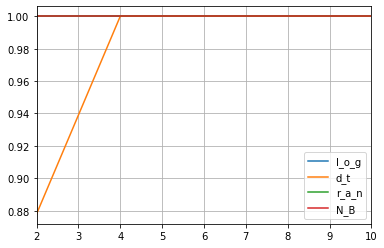

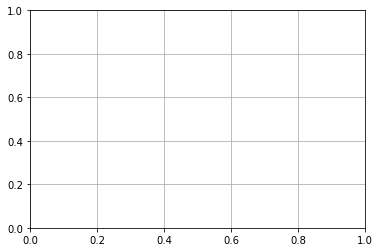

In [61]:
df_test.plot(grid = 1)
plt.show()
plt.grid()

In [62]:
#building the model at k value 2 
test_scores={}
train_scores={}
for i in range(2,4,2):
    kf = KFold(n_splits = i)
    sum_train = 0
    sum_test = 0
    data = df
    for train,test in kf.split(data):
        train_data = data.iloc[train,:]
        test_data = data.iloc[test,:]
        x_train = train_data.drop(["prognosis"],axis=1)
        y_train = train_data['prognosis']
        x_test = test_data.drop(["prognosis"],axis=1)
        y_test = test_data["prognosis"]
        algo_model = dt.fit(x_train,y_train)
        sum_train += dt.score(x_train,y_train)
        y_pred = dt.predict(x_test)
        sum_test += accuracy_score(y_test,y_pred)
    average_test = sum_test/i
    average_train = sum_train/i
    test_scores[i] = average_test
    train_scores[i] = average_train
    print("kvalue: ",i)  

kvalue:  2


In [63]:
print(train_scores)
print(test_scores)

{2: 1.0}
{2: 0.874390243902439}


In [64]:
#saved the model 
from sklearn.externals import joblib
joblib.dump(dt,'my_model_for_healthcare')

['my_model_for_healthcare']

In [ ]:
a = list(range(2,134))
i_name  = (input('Enter your name :'))
i_age = (int(input('Enter your age:')))
for i in range(len(x.columns)):
    print(str(i+1+1) + ":", x.columns[i])
choices = input('Enter the Serial no.s which is your Symptoms are exist:  ')
b = [int(x) for x in choices.split()]
count = 0
while count < len(b):
    item_to_replace =  b[count]
    replacement_value = 1
    indices_to_replace = [i for i,x in enumerate(a) if x==item_to_replace]
    count += 1
    for i in indices_to_replace:
        a[i] = replacement_value
a = [0 if x !=1 else x for x in a]
y_diagnosis = dt.predict([a])
y_pred_2 = dt.predict_proba([a])
print(('Name of the infection = %s , confidence score of : = %s') %(y_diagnosis[0],y_pred_2.max()* 100),'%' )
print(('Name = %s , Age : = %s') %(i_name,i_age))
